<a href="https://www.kaggle.com/code/mcsadri/linear-regresssion?scriptVersionId=127983359" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Linear Regression with sklearn

**Author**: [Manuch S.](https://github.com/mcsadri)  
**Input**: [2,2k+ Scotch Whisky Reviews](https://www.kaggle.com/datasets/koki25ando/22000-scotch-whisky-reviews): a dataset including 2,2k+ Scotch Whisky reviews (originally collected from the Whisky Advocate database).

#### Overview

Performing exploratory analysis by using Linear Regressions on a Kaggle data set.

#### Feature Tasks and Requirements

- [X] Select a Kaggle data set that is suitable for Linear Regression.
    - Note make sure the data set is stored as csv file/s.
    - Data set must be continous values appropriate for a Linear Regression. If you’re not sure then ask Instructor or TA.
- [X] Load the data you receive into a Pandas DataFrame.
- [X] Show the first five rows of the data set.
- [X] Show the description and the info of the data set.
- [X] Ensure that any date columns have been cast into a datetime object in your DataFrame.
- [X] Using a regression model, split your data into train and test portions.
- [X] Fit your training split to the regression model.
- [X] Show your regression model’s score.
- [X] Draw at least three conclusions from your regression model.
- [X] Your notebook should be clutter free and polished.

#### UAT

No acceptance tests today, but Notebook should clearly display its conclusions.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/22000-scotch-whisky-reviews/scotch_review.csv


### Read the original dataset, and display the first 5 rows

In [2]:
raw_df = pd.read_csv("/kaggle/input/22000-scotch-whisky-reviews/scotch_review.csv")
raw_df.head(5)

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


### get describe(), info(), and shape() for the raw dataset

In [3]:
print("The description of the raw dataset is:")
print("")
print(raw_df.describe())
print("")
print("The raw dataset information is:")
print("")
raw_df.info()
print("")
print(f"The raw dataset shape is: {np.shape(raw_df)}")
print("")

The description of the raw dataset is:

        Unnamed: 0  review.point
count  2247.000000   2247.000000
mean   1124.000000     86.700045
std     648.797349      4.054055
min       1.000000     63.000000
25%     562.500000     84.000000
50%    1124.000000     87.000000
75%    1685.500000     90.000000
max    2247.000000     97.000000

The raw dataset information is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2247 non-null   int64 
 1   name          2247 non-null   object
 2   category      2247 non-null   object
 3   review.point  2247 non-null   int64 
 4   price         2247 non-null   object
 5   currency      2247 non-null   object
 6   description   2247 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB

The raw dataset shape is: (2247, 7)



### Validate which currencies are present in the DataFrame (so we can scrub any non-$ later, if needed)

In [4]:
currency_types = raw_df['currency'].value_counts().sort_values(ascending=False)
currency_types

$    2247
Name: currency, dtype: int64

### Using the review.point and price columns: Clean price data so it can be converted to int, and remove index 19 from both as an incompatible data point. Create new DataFrame with these two series, and limits to reviews where price < 1000 to trim extremely expensive outliers.

### display the first 5 rows of the modified dataframe

In [5]:
# str.replace and regex pattern solution via https://www.kaggle.com/code/theenduser/scotch-whiskey-data-cleaning?scriptVersionId=5690584&cellId=13
series_price = raw_df.price.str.replace("[({',$/qwertyuioplkjhgfdsazxcvbnm%:]", "", regex=True)
series_price = series_price.drop(19)
series_price = series_price.astype(float).astype(int)

series_review = raw_df['review.point']
series_review = series_review.drop(19)

df = pd.concat([series_review, series_price], axis = 1)
df_1000 = df[df.price < 1000]

df_1000.head(5)

,review.point,price
0,97,225
3,96,325
4,96,160
5,96,85
10,96,750


### get describe(), info(), and shape() for the modified dataset

In [6]:
print("The description of the dataset is:")
print("")
print(df_1000.describe())
print("")
print("The dataset's information is:")
print("")
df_1000.info()
print("")
print(f"The dataset shape is: {np.shape(df_1000)}")
print("")

The description of the dataset is:

       review.point        price
count   2101.000000  2101.000000
mean      86.457401   158.214184
std        3.925948   159.662703
min       63.000000    12.000000
25%       84.000000    67.000000
50%       87.000000   100.000000
75%       89.000000   170.000000
max       97.000000   995.000000

The dataset's information is:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2246
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   review.point  2101 non-null   int64
 1   price         2101 non-null   int64
dtypes: int64(2)
memory usage: 49.2 KB

The dataset shape is: (2101, 2)



### Plot the filtered dataset

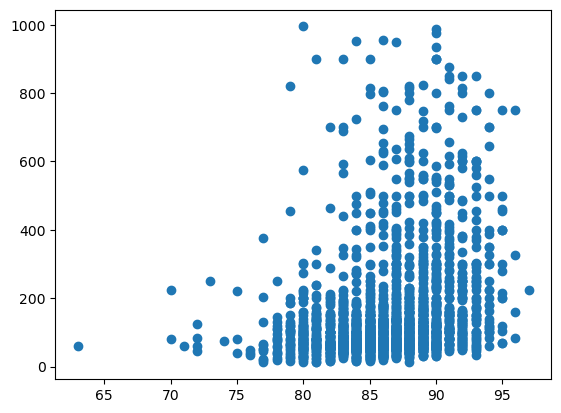

In [7]:
plt.scatter(df_1000['review.point'],df_1000['price'] )
plt.show()

### Split the dataframe into separate series for Linear Regression modeling

In [8]:
reviews = df_1000['review.point']
reviews = reviews.values.reshape(-1, 1)
prices = df_1000['price']

model = LinearRegression().fit(reviews, prices)
model

LinearRegression()

### Creation a prediction using the LR model

In [9]:
prediction = model.predict(reviews)
prediction

array([ 277.05277214,  265.78054306,  265.78054306, ...,  -27.2974132 ,
        -27.2974132 , -106.20301681])

### Plot the prediction over the dataset

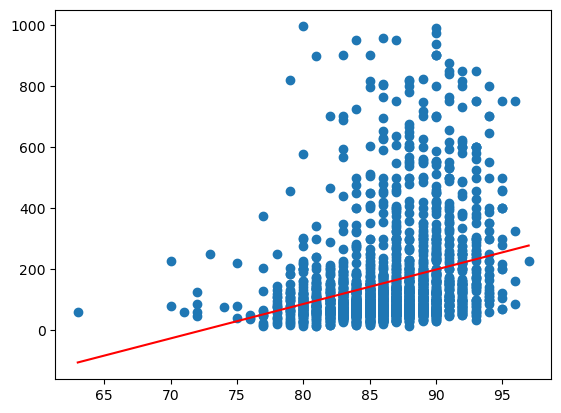

In [10]:
plt.scatter(reviews, prices)
plt.plot(reviews, prediction, color="red")
plt.show()

### Create a Test-Train split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(reviews, prices, test_size=.2, train_size=.8, random_state=100)
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1680, 1)
y_train shape (1680,)
X_test shape (421, 1)
y_test shape (421,)


### Plot the training data

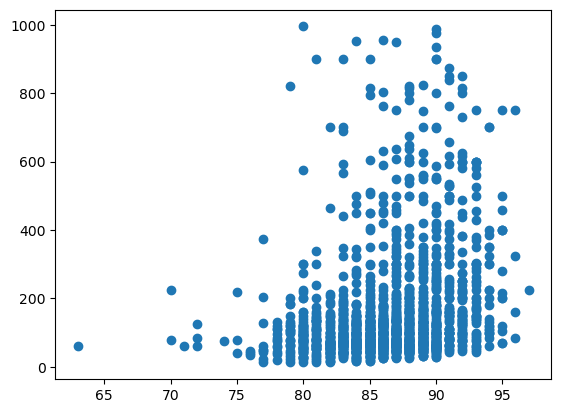

In [12]:
plt.scatter(X_train, y_train)

### Now plot the test data

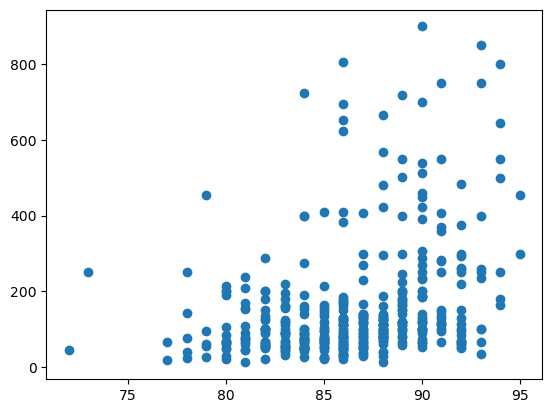

In [13]:
plt.scatter(X_test, y_test)

### Create the Linear Model (lm)

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_predict = lm.predict(X_test)

print(y_predict)
print(y_test)

[153.96477111 208.14626253 186.47366596 132.29217454 164.80106939
 153.96477111 164.80106939 240.65515738 197.30996424 110.61957797
 164.80106939 132.29217454 132.29217454 218.98256081 186.47366596
 153.96477111 197.30996424 186.47366596 132.29217454  88.9469814
 110.61957797 164.80106939 164.80106939 164.80106939 121.45587626
 175.63736768 175.63736768 143.12847282 175.63736768 218.98256081
 240.65515738 110.61957797 197.30996424 132.29217454 121.45587626
 143.12847282 164.80106939 143.12847282 208.14626253 153.96477111
  88.9469814  186.47366596 132.29217454 164.80106939 175.63736768
  13.09289342 218.98256081 175.63736768 132.29217454 132.29217454
 197.30996424 153.96477111 153.96477111 121.45587626 132.29217454
 143.12847282 175.63736768  88.9469814  175.63736768 208.14626253
 197.30996424 121.45587626 186.47366596  88.9469814  186.47366596
 175.63736768 208.14626253 143.12847282 218.98256081 153.96477111
 121.45587626 229.8188591  218.98256081 153.96477111 110.61957797
 164.801069

### What's the train and test accuracy?

In [15]:
print(f"Train accuracy {round(lm.score(X_train, y_train)*100,2)}%" )
print(f"Test accuracy {round(lm.score(X_test, y_test)*100,2)}%" )

Train accuracy 7.02%
Test accuracy 10.54%


### Plot the final trained model

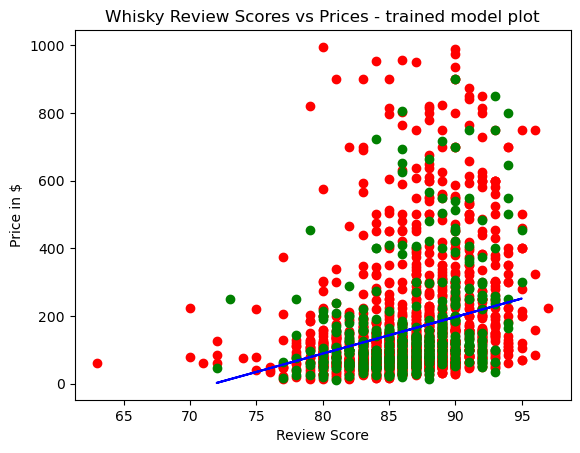

In [16]:
plt.scatter(X_train, y_train, color="red")
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_predict, color="blue")
plt.xlabel("Review Score")
plt.ylabel("Price in $")
plt.title("Whisky Review Scores vs Prices - trained model plot")
plt.show()

### Conclusions
- There is no predicatble relationship between the simplified comparion of the price of a bottle of whisky and its review score. The price, at most denotes, scarcity.
- That being said: There are numerous expressions available at reason prices that meet or exceed the review scores of more costly, prestigous bottlings.
- The original dataset includes additional data points, including, whisky category, that were not explored in this basic modeling. This could provide additional insight to prices vs reviews scores in single malts versus blended malts or single grain.